In [1]:
"""
Zillow

Create a python script or jupyter notebook named `explore_zillow` that does the following:
"""

# ignore warnings
import warnings

# Wrangling
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Exploring
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
sns.set_style('whitegrid') 

import acquire
import summarize
import prepare
import wrangle_zillow

In [2]:
# Use wrangle_zollow to bring in zillow dataset
df = wrangle_zillow.wrangle_zillow_data()

# Look at datatypes of zillow
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52160 entries, 0 to 77379
Data columns (total 25 columns):
logerror                        52160 non-null float64
transactiondate                 52160 non-null object
id                              52160 non-null int64
parcelid                        52160 non-null int64
bathroomcnt                     52160 non-null float64
bedroomcnt                      52160 non-null float64
buildingqualitytypeid           33627 non-null float64
calculatedbathnbr               52145 non-null float64
calculatedfinishedsquarefeet    52160 non-null float64
fips                            52160 non-null float64
heatingorsystemtypeid           33823 non-null float64
latitude                        52160 non-null float64
longitude                       52160 non-null float64
lotsizesquarefeet               51806 non-null float64
propertycountylandusecode       52160 non-null object
propertylandusetypeid           52160 non-null float64
rawcensustractand

In [3]:
# Look at fips variable
df.fips.value_counts()

6,037.00    33751
6,059.00    14054
6,111.00     4355
Name: fips, dtype: int64

In [4]:
# drop the id column and set the parcelid to be the index of zillow
df.drop(columns = ['id'], inplace = True)
df.set_index('parcelid', inplace = True)
df. head()

,logerror,transactiondate,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,fips,heatingorsystemtypeid,latitude,...,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,censustractandblock
parcelid,,,,,,,,,,,,,,,,,,,,,
14297519,0.03,2017-01-01,3.50,4.00,nan,3.50,"3,100.00","6,059.00",nan,"33,634,931.00",...,261.00,"60,590,630.07","53,571.00","1,286.00","96,978.00",0.00,"1,998.00","1,023,282.00","11,013.72","60,590,630,072,012.00"
17052889,0.06,2017-01-01,1.00,2.00,nan,1.00,"1,465.00","6,111.00",nan,"34,449,266.00",...,261.00,"61,110,010.02","13,091.00","2,061.00","97,099.00",5.00,"1,967.00","464,000.00","5,672.48","61,110,010,023,006.00"
14186244,0.01,2017-01-01,2.00,3.00,nan,2.00,"1,243.00","6,059.00",nan,"33,886,168.00",...,261.00,"60,590,218.02","21,412.00","1,286.00","97,078.00",6.00,"1,962.00","564,778.00","6,488.30","60,590,218,022,012.00"
12177905,-0.10,2017-01-01,3.00,4.00,8.00,3.00,"2,376.00","6,037.00",2.00,"34,245,180.00",...,261.00,"60,373,001.00","396,551.00","3,101.00","96,330.00",0.00,"1,970.00","145,143.00","1,777.51","60,373,001,001,006.00"
12095076,-0.00,2017-01-01,3.00,4.00,9.00,3.00,"2,962.00","6,037.00",2.00,"34,145,202.00",...,261.00,"60,374,608.00","47,019.00","3,101.00","96,293.00",0.00,"1,950.00","773,303.00","9,516.26","60,374,608,001,014.00"


In [5]:
# Split data:
train, test = train_test_split(df, test_size = .3, random_state = 42)

In [6]:
# Use MinMaxScaler to scale variables that are number types.
scaler = MinMaxScaler()
num_vars = list(train.select_dtypes('number').columns)
train[num_vars] = scaler.fit_transform(train[num_vars])

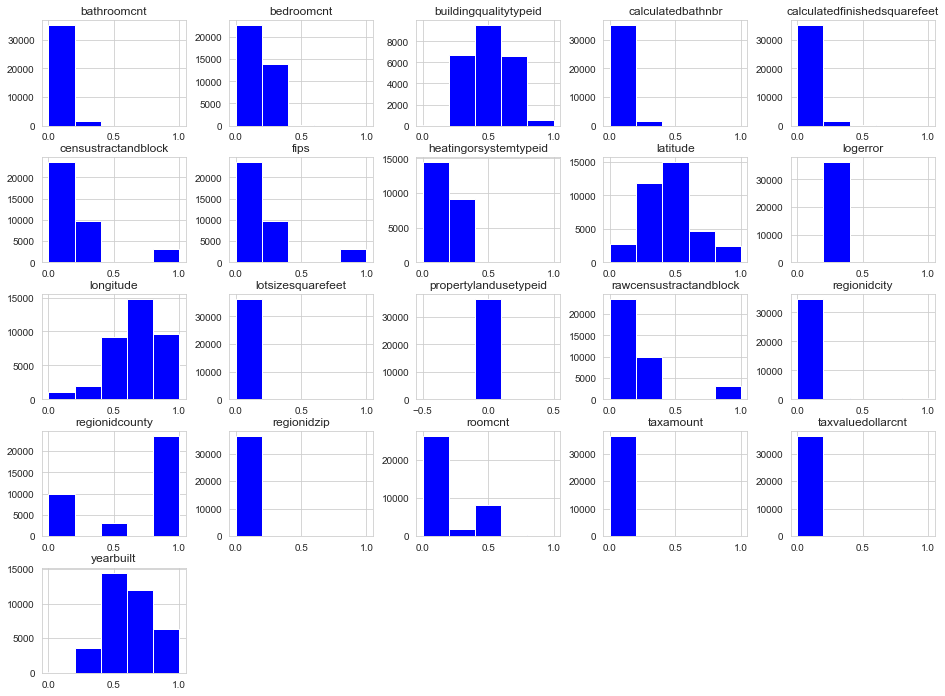

In [8]:
# Create a histogram of numberic variables
train.select_dtypes('number').hist(figsize = (16,12), bins = 5, color = 'blue')
plt.show()

In [11]:
train.select_dtypes('number')

,logerror,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,fips,heatingorsystemtypeid,latitude,longitude,...,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,censustractandblock
parcelid,,,,,,,,,,,,,,,,,,,,,
17286201,0.29,0.09,0.23,nan,0.09,0.10,1.00,nan,0.57,0.30,...,0.00,1.00,0.08,0.43,0.00,0.47,0.72,0.01,0.01,1.00
10871814,0.31,0.06,0.15,0.64,0.06,0.08,0.00,0.04,0.59,0.55,...,0.00,0.00,0.02,1.00,0.00,0.00,0.62,0.01,0.01,0.00
14038937,0.31,0.06,0.15,nan,0.06,0.06,0.30,0.22,0.27,0.76,...,0.00,0.30,0.06,0.00,0.00,0.33,0.62,0.01,0.01,0.30
14194165,0.31,0.09,0.08,nan,0.09,0.07,0.30,nan,0.36,0.88,...,0.00,0.30,0.05,0.00,0.00,0.00,0.73,0.01,0.01,0.30
14409429,0.35,0.09,0.15,nan,0.09,0.24,0.30,nan,0.13,0.94,...,0.00,0.30,0.08,0.00,0.00,0.47,0.75,0.01,0.01,0.30
13028304,0.32,0.06,0.23,0.45,0.06,0.06,0.00,0.04,0.53,0.83,...,0.00,0.00,0.09,1.00,0.00,0.00,0.56,0.00,0.00,0.00
11961244,0.30,0.00,0.08,0.27,0.00,0.05,0.00,0.26,0.53,0.65,...,0.00,0.00,0.02,1.00,0.00,0.00,0.40,0.01,0.01,0.00
11236364,0.29,0.12,0.23,0.64,0.12,0.10,0.00,0.04,0.82,0.74,...,0.00,0.01,0.09,1.00,0.00,0.00,0.86,0.00,0.01,0.01
11138313,0.32,0.06,0.15,0.45,0.06,0.07,0.00,0.04,0.70,0.48,...,0.00,0.01,0.13,1.00,0.00,0.00,0.60,0.00,0.01,0.01


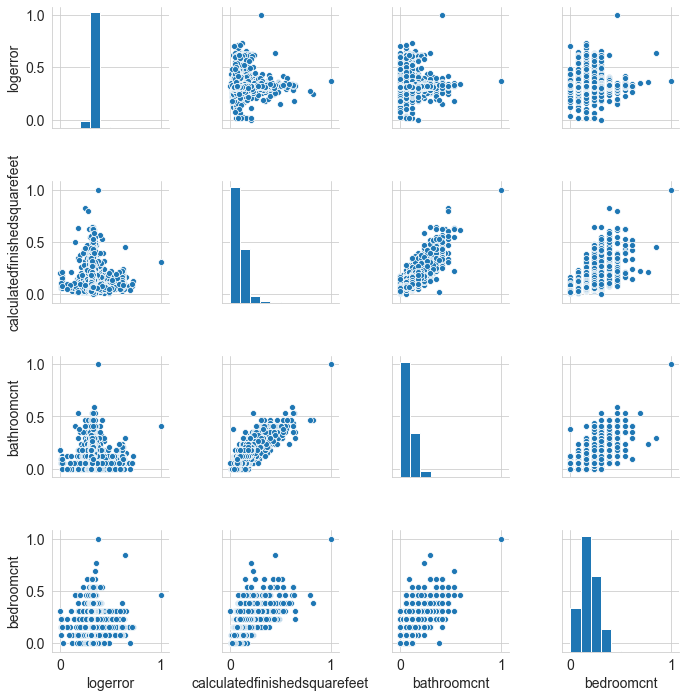

In [20]:
# Create pairplot.
sns.pairplot(train[['logerror', 'calculatedfinishedsquarefeet', 'bathroomcnt', 'bedroomcnt']])

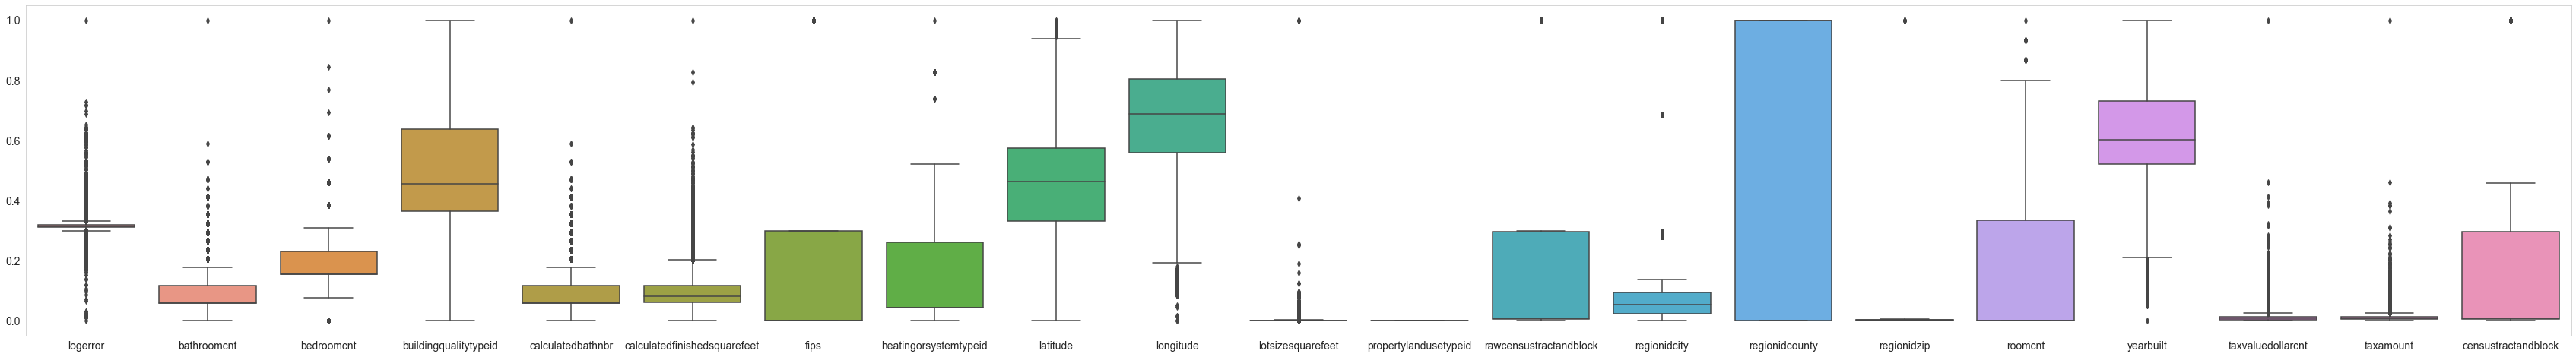

In [22]:
plt.figure(figsize = (60,8))
plt.rc('font', size=14)
sns.boxplot(data=train)

(0.0, 0.6)

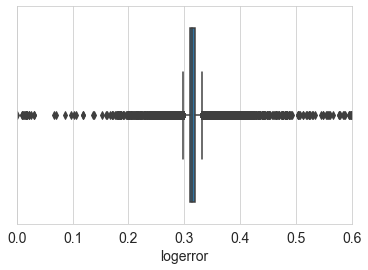

In [17]:
sns.boxplot(train.logerror)
plt.xlim(0.0,0.6)

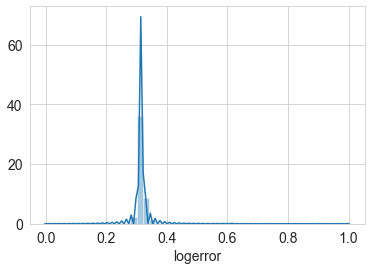

In [18]:
sns.distplot(train.logerror)

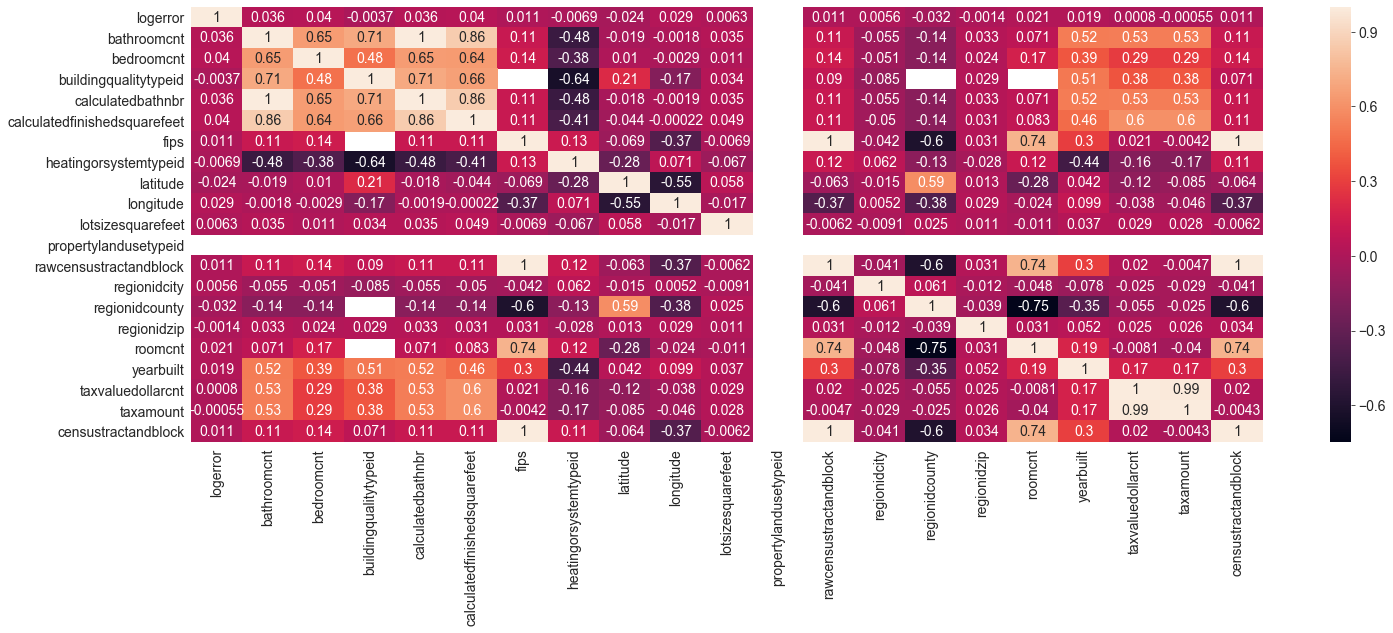

In [26]:
plt.figure(figsize = (24,8))
sns.heatmap(train.select_dtypes('number').corr(), annot=True)

In [25]:
train.corr()

,logerror,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,fips,heatingorsystemtypeid,latitude,longitude,...,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,censustractandblock
logerror,1.00,0.04,0.04,-0.00,0.04,0.04,0.01,-0.01,-0.02,0.03,...,nan,0.01,0.01,-0.03,-0.00,0.02,0.02,0.00,-0.00,0.01
bathroomcnt,0.04,1.00,0.65,0.71,1.00,0.86,0.11,-0.48,-0.02,-0.00,...,nan,0.11,-0.06,-0.14,0.03,0.07,0.52,0.53,0.53,0.11
bedroomcnt,0.04,0.65,1.00,0.48,0.65,0.64,0.14,-0.38,0.01,-0.00,...,nan,0.14,-0.05,-0.14,0.02,0.17,0.39,0.29,0.29,0.14
buildingqualitytypeid,-0.00,0.71,0.48,1.00,0.71,0.66,nan,-0.64,0.21,-0.17,...,nan,0.09,-0.08,nan,0.03,nan,0.51,0.38,0.38,0.07
calculatedbathnbr,0.04,1.00,0.65,0.71,1.00,0.86,0.11,-0.48,-0.02,-0.00,...,nan,0.11,-0.06,-0.14,0.03,0.07,0.52,0.53,0.53,0.11
calculatedfinishedsquarefeet,0.04,0.86,0.64,0.66,0.86,1.00,0.11,-0.41,-0.04,-0.00,...,nan,0.11,-0.05,-0.14,0.03,0.08,0.46,0.60,0.60,0.11
fips,0.01,0.11,0.14,nan,0.11,0.11,1.00,0.13,-0.07,-0.37,...,nan,1.00,-0.04,-0.60,0.03,0.74,0.30,0.02,-0.00,1.00
heatingorsystemtypeid,-0.01,-0.48,-0.38,-0.64,-0.48,-0.41,0.13,1.00,-0.28,0.07,...,nan,0.12,0.06,-0.13,-0.03,0.12,-0.44,-0.16,-0.17,0.11
latitude,-0.02,-0.02,0.01,0.21,-0.02,-0.04,-0.07,-0.28,1.00,-0.55,...,nan,-0.06,-0.01,0.59,0.01,-0.28,0.04,-0.12,-0.09,-0.06
longitude,0.03,-0.00,-0.00,-0.17,-0.00,-0.00,-0.37,0.07,-0.55,1.00,...,nan,-0.37,0.01,-0.38,0.03,-0.02,0.10,-0.04,-0.05,-0.37


In [28]:
train.fips.value_counts()

0.00    23565
0.30     9854
1.00     3093
Name: fips, dtype: int64

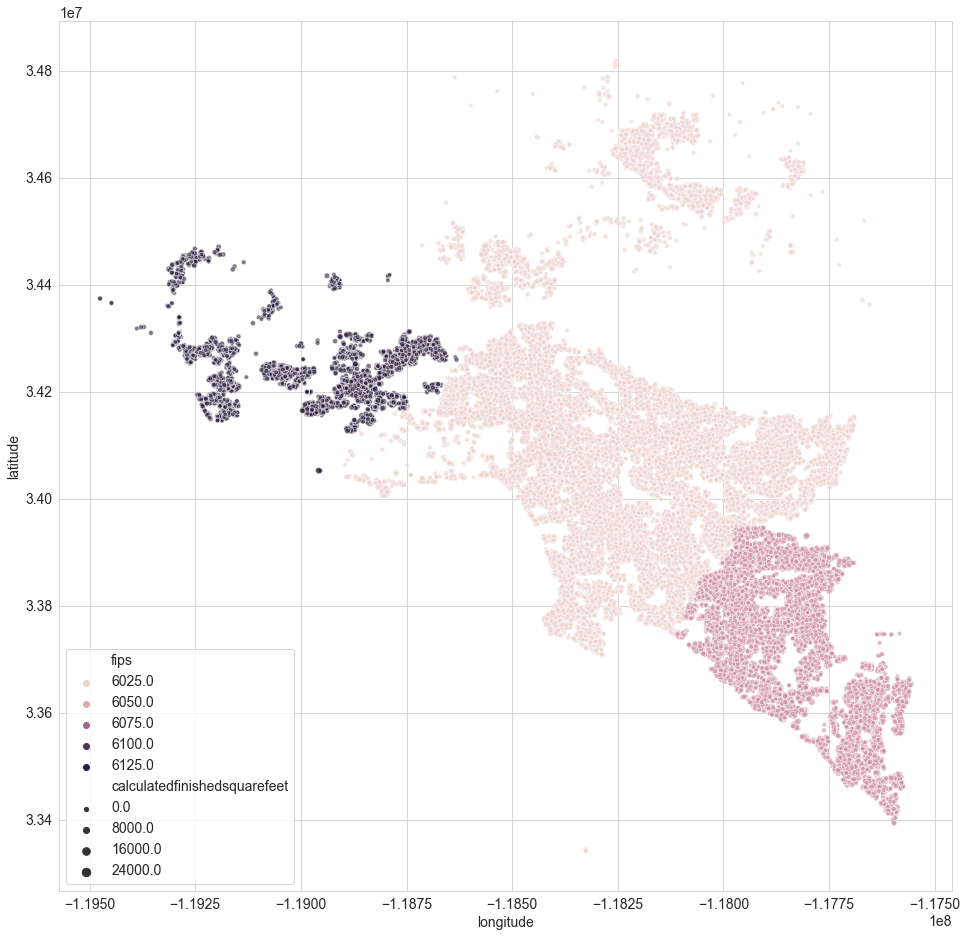

In [122]:
plt.figure(figsize=(16,16))
sns.scatterplot(x='longitude', y = 'latitude', data = df, hue = 'fips', size = 'calculatedfinishedsquarefeet', alpha = .6)

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36512 entries, 17286201 to 14346061
Data columns (total 23 columns):
logerror                        36512 non-null float64
transactiondate                 36512 non-null object
bathroomcnt                     36512 non-null float64
bedroomcnt                      36512 non-null float64
buildingqualitytypeid           23485 non-null float64
calculatedbathnbr               36501 non-null float64
calculatedfinishedsquarefeet    36512 non-null float64
fips                            36512 non-null object
heatingorsystemtypeid           23629 non-null float64
latitude                        36512 non-null float64
longitude                       36512 non-null float64
lotsizesquarefeet               36256 non-null float64
propertycountylandusecode       36512 non-null object
propertylandusetypeid           36512 non-null float64
rawcensustractandblock          36512 non-null float64
regionidcity                    35801 non-null float64
regi

In [49]:
df[df.regionidzip < 130000].regionidzip.value_counts(bins = 10)

(96935.4, 97071.6]      12194
(96118.2, 96254.4]       8756
(96254.4, 96390.6]       8505
(96390.6, 96526.8]       7612
(95980.637, 96118.2]     7602
(97071.6, 97207.8]       3787
(97207.8, 97344.0]       3520
(96526.8, 96663.0]        149
(96799.2, 96935.4]          0
(96663.0, 96799.2]          0
Name: regionidzip, dtype: int64

In [48]:
df.regionidzip.describe()

count              52,137.00
mean               96,636.26
std                 4,617.25
min                95,982.00
25%                96,206.00
50%                96,412.00
75%                96,995.00
max               399,675.00
Name: regionidzip, dtype: float64

In [59]:
zip_logerror_mean = pd.DataFrame(df.groupby('regionidzip')['logerror'].mean()).rename(columns = {'logerror': 'logerror_mean'})
zip_logerror_mean.head()


,logerror_mean
regionidzip,
"95,982.00",0.00
"95,983.00",0.01
"95,984.00",-0.08
"95,985.00",-0.01
"95,986.00",-0.01


In [63]:
from scipy import stats

In [115]:
significant_zips = []
p_vals = []

for i in df.regionidzip.unique():
    stat, pval = stats.ttest_ind(
        df[df.regionidzip == i].logerror,
        df[df.regionidzip != i].logerror)
    if pval < .05:
        significant_zips = significant_zips + [i]
        p_vals = p_vals + [pval]
sig_zips = pd.DataFrame({'significant_zips': significant_zips, 'p_vals': p_vals}).significant_zips

In [107]:
len(df.regionidzip.unique())

380

In [117]:
zips = df[df.regionidzip.isin(sig_zips)]
zips

,logerror,transactiondate,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,fips,heatingorsystemtypeid,latitude,...,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,censustractandblock
parcelid,,,,,,,,,,,,,,,,,,,,,
14387959,-0.01,2017-01-02,2.50,3.00,nan,2.50,"2,074.00","6,059.00",nan,"33,586,693.00",...,261.00,"60,590,423.27","25,458.00","1,286.00","96,971.00",7.00,"1,978.00","597,213.00","6,172.28","60,590,423,273,002.00"
14349322,0.04,2017-01-02,2.50,3.00,nan,2.50,"2,018.00","6,059.00",nan,"33,728,985.00",...,261.00,"60,590,524.20","52,650.00","1,286.00","96,954.00",0.00,"1,998.00","534,612.00","7,141.56","60,590,524,201,100.00"
12531488,0.04,2017-01-02,1.00,3.00,4.00,1.00,"1,641.00","6,037.00",7.00,"33,760,954.00",...,261.00,"60,375,776.04","46,298.00","3,101.00","96,237.00",0.00,"1,944.00","432,754.00","5,212.75","60,375,776,035,014.00"
14314879,-0.00,2017-01-02,4.50,6.00,nan,4.50,"3,870.00","6,059.00",nan,"33,609,965.00",...,261.00,"60,590,626.44","53,571.00","1,286.00","96,957.00",11.00,"1,972.00","2,040,000.00","21,758.26","60,590,626,444,017.00"
14338242,-0.02,2017-01-02,2.50,4.00,nan,2.50,"1,987.00","6,059.00",nan,"33,794,052.00",...,261.00,"60,590,756.05","33,252.00","1,286.00","97,067.00",0.00,"1,989.00","703,127.00","8,287.36","60,590,756,052,002.00"
14344863,-0.00,2017-01-02,2.50,4.00,nan,2.50,"1,979.00","6,059.00",nan,"33,713,632.00",...,261.00,"60,590,525.25","52,650.00","1,286.00","96,954.00",8.00,"1,977.00","800,017.00","8,138.06","60,590,525,253,000.00"
10871883,0.05,2017-01-02,2.00,5.00,6.00,2.00,"1,818.00","6,037.00",2.00,"34,209,855.00",...,261.00,"60,371,220.00","12,447.00","3,101.00","96,450.00",0.00,"1,948.00","166,428.00","2,196.73","60,371,220,002,007.00"
13022358,0.10,2017-01-02,1.00,2.00,5.00,1.00,609.00,"6,037.00",7.00,"34,110,426.00",...,261.00,"60,374,045.01","37,015.00","3,101.00","96,464.00",0.00,"1,948.00","162,320.00","2,251.73","60,374,045,011,006.00"
13007403,-0.03,2017-01-02,3.00,3.00,8.00,3.00,"2,380.00","6,037.00",2.00,"34,104,778.00",...,261.00,"60,374,320.00","14,111.00","3,101.00","96,517.00",0.00,"1,991.00","654,279.00","7,676.28","60,374,320,004,007.00"


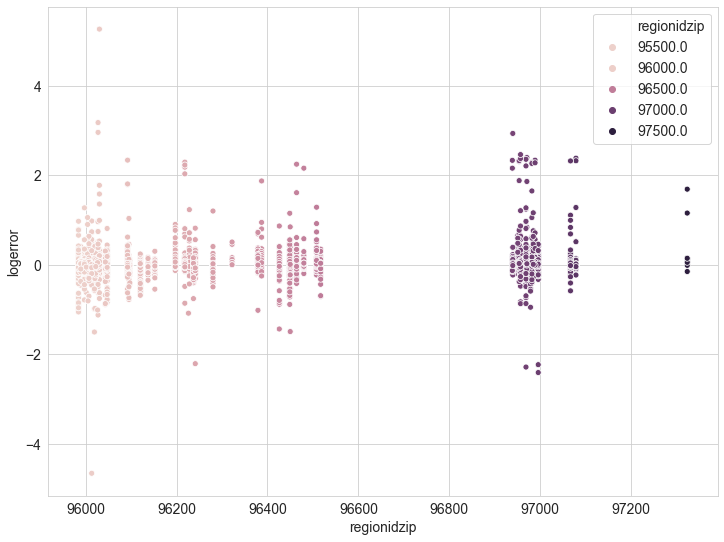

In [126]:
plt.figure(figsize=(12,9))
sns.scatterplot(x = 'regionidzip', y='logerror', data=zips, hue = 'regionidzip')

In [129]:
significant_fips = []
p_vals = []

for i in df.fips.unique():
    stat, pval = stats.ttest_ind(
        df[df.fips == i].logerror,
        df[df.fips != i].logerror)
    if pval < .05:
        significant_fips = significant_fips + [i]
        p_vals = p_vals + [pval]
sig_fips = pd.DataFrame({'significant_fips': significant_fips, 'p_vals': p_vals}).significant_fips
sig_fips


0               6,059.00
1               6,037.00
Name: significant_fips, dtype: float64

LA and Orange county are signigicant.